In [2]:
# import the data
import pandas as pd
data = pd.read_csv("E:/DATA SCI ASSI/Hamspam.csv",encoding = "ISO-8859-1")

In [3]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
# check null values
data.isnull().sum()

type    0
text    0
dtype: int64

In [5]:
# read the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


# Data Cleaning [for text type data set]

In [11]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [12]:
data['text colm name'] = data.text.apply(clean)
data.text

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or å£10,000...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
Name: text, Length: 5559, dtype: object

In [14]:
data

,type,text,text colm name
0,ham,Hope you are having a good week. Just checking in,hope you are having a good week just checking in
1,ham,K..give back my thanks.,kgive back my thanks
2,ham,Am also doing in cbe only. But have to pay.,am also doing in cbe only but have to pay
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",complimentary star ibiza holiday or å£ cash n...
4,spam,okmail: Dear Dave this is your final notice to...,okmail dear dave this is your final notice to ...
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,you are a great role model you are giving so m...
5555,ham,"Awesome, I remember the last time we got someb...",awesome i remember the last time we got somebo...
5556,spam,"If you don't, your prize will go to another cu...",if you dont your prize will go to another cust...
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",sms ac jsco energy is high but u may not know ...


In [15]:
#Word frequency
freq = pd.Series(' '.join(data['text colm name']).split()).value_counts()[:20] # for top 20
freq

to      2243
i       2228
you     2118
a       1437
the     1323
u       1298
and      965
is       892
in       886
me       789
my       753
for      709
your     659
of       619
it       616
call     577
have     575
on       534
that     509
are      490
dtype: int64

In [16]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [17]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

I       1464
u        854
2        455
call     376
get      325
U        301
ur       296
I'm      285
#        279
You      265
4        254
.        242
go       237
know     224
like     224
got      204
come     199
&        194
?        182
...      170
dtype: int64

In [18]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [19]:
word_freq_df.head(30)

,term,occurrences,frequency
0,00,10,0.000178
1,000,29,0.000517
2,000pes,1,0.000018
3,008704050406,2,0.000036
4,0089,1,0.000018
5,0121,1,0.000018
6,01223585236,1,0.000018
7,01223585334,2,0.000036
8,0125698789,1,0.000018
9,02,8,0.000143


In [20]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [21]:
df

,00,000,03,04,0800,08000839402,08000930705,10,100,1000,...,yes,yesterday,yo,yr,yup,ââ,ââèït,ûªs,ûªt,ûï
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.318582,0.0,0.0,0.0,0.0,0.0,0.301802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [22]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [23]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,please call,55
1,co uk,49
2,call later,48
3,ll call,45
4,let know,40


[Text(0, 0, 'please call'),
 Text(1, 0, 'co uk'),
 Text(2, 0, 'call later'),
 Text(3, 0, 'll call'),
 Text(4, 0, 'let know'),
 Text(5, 0, 'sorry ll'),
 Text(6, 0, 'take care'),
 Text(7, 0, 'good morning'),
 Text(8, 0, 'right now'),
 Text(9, 0, 'po box'),
 Text(10, 0, 'to claim'),
 Text(11, 0, 'your mobile'),
 Text(12, 0, 'guaranteed call'),
 Text(13, 0, 'new year'),
 Text(14, 0, '1000 cash'),
 Text(15, 0, 'prize guaranteed'),
 Text(16, 0, 'we re'),
 Text(17, 0, 'ok lor'),
 Text(18, 0, 'pls send'),
 Text(19, 0, 'every week')]

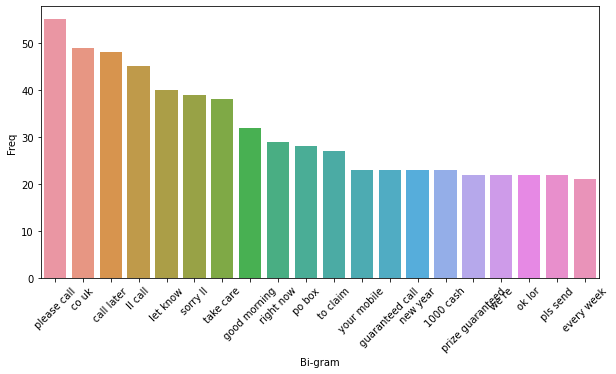

In [24]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [25]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [26]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [27]:
top3_df

,Tri-gram,Freq
0,ll call later,41
1,sorry ll call,38
2,prize guaranteed call,21
3,urgent your mobile,18
4,happy new year,18
...,...,...
195,free call the,6
196,call the mobile,6
197,the mobile update,6
198,had mobile 11mths,6


[Text(0, 0, 'll call later'),
 Text(1, 0, 'sorry ll call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'urgent your mobile'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'suite342 2lands row'),
 Text(6, 0, 'land line claim'),
 Text(7, 0, 'we trying contact'),
 Text(8, 0, 'reply call 08000930705'),
 Text(9, 0, 'pls send message'),
 Text(10, 0, 'private your 2003'),
 Text(11, 0, 'your 2003 account'),
 Text(12, 0, '2003 account statement'),
 Text(13, 0, 'this 2nd attempt'),
 Text(14, 0, 'guaranteed 1000 cash'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right now'),
 Text(19, 0, 'right now pls')]

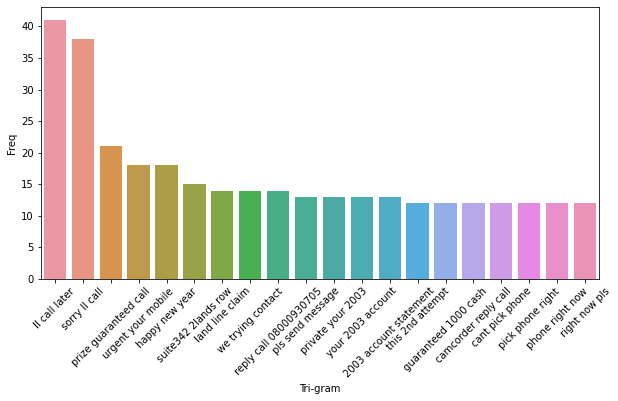

In [28]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [29]:
string_Total = " ".join(data["text"])

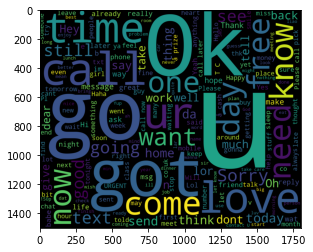

In [30]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [31]:
data.head()

,type,text,text colm name
0,ham,Hope good week. Just checking,hope you are having a good week just checking in
1,ham,K..give back thanks.,kgive back my thanks
2,ham,Am also cbe only. But pay.,am also doing in cbe only but have to pay
3,spam,"complimentary 4 STAR Ibiza Holiday å£10,000 ca...",complimentary star ibiza holiday or å£ cash n...
4,spam,okmail: Dear Dave final notice collect 4* Tene...,okmail dear dave this is your final notice to ...


In [32]:
def split_into_words(i):
    return (i.split(" "))


In [33]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [34]:
email_test

,type,text,text colm name
209,ham,u go home liao? Ask dad pick 6...,u go home liao ask dad to pick me up at
121,ham,Really? I crashed cuddled sofa.,really i crashed out cuddled on my sofa
4704,spam,25p 4 alfie Moon's Children need song ur mob. ...,alfie moons children in need song on ur mob ...
3240,ham,I like dis sweater fr mango size already irrit...,i like dis sweater fr mango but no more my siz...
4427,ham,Tessy..pls favor. Pls convey birthday wishes N...,tessypls do me a favor pls convey my birthday ...
...,...,...,...
4254,ham,Who u talking about?,who u talking about
3623,ham,We pizza u want,we have pizza if u want
1520,ham,"Sorry, I'll call later",sorry ill call later
2421,ham,"Awesome, I'll see bit",awesome ill see you in a bit


In [35]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    



In [36]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 15373)

In [37]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 15373)

In [38]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%



In [39]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 8%

# Using TFIDF

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)



(1668, 15373)

In [41]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

 


In [42]:
accuracy_train_m

0.9673605756874839

In [43]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [44]:
accuracy_test_g

0.9238609112709832